In [652]:
import math
from tools import *
%matplotlib inline
from matplotlib.patches import Circle
#importlib.reload(tools)

In [653]:
# Prefix for data storage
prefix = "data/"

# File containing coordinates of the site
coord_sites_file = "Coordinates.csv"

# Extension suffix for site antenna
suffix = "_Antennes.csv"

sites = get_features(prefix, coord_sites_file, suffix)

In [654]:
sites
s1, s2, s3, s4 = list(sites.keys())

In [659]:
api = overpass.API()
for site in sites:
    print ("J'ai tourné")
    sites[site]['buildings'] = call_api_mapQuery(site, api, sites)

J'ai tourné
J'ai tourné
J'ai tourné
J'ai tourné


### Valeurs d'atténuation

In [660]:
att_h, att_v = extract_radiation_value("data/antenna/80010664_0821_x_co_m45_02t.msi")

In [661]:
att_h

{0.0: 0.0,
 1.0: 0.01,
 2.0: 0.02,
 3.0: 0.04,
 4.0: 0.06,
 5.0: 0.09,
 6.0: 0.12,
 7.0: 0.16,
 8.0: 0.2,
 9.0: 0.25,
 10.0: 0.31,
 11.0: 0.36,
 12.0: 0.43,
 13.0: 0.5,
 14.0: 0.57,
 15.0: 0.65,
 16.0: 0.73,
 17.0: 0.82,
 18.0: 0.92,
 19.0: 1.02,
 20.0: 1.13,
 21.0: 1.24,
 22.0: 1.35,
 23.0: 1.47,
 24.0: 1.6,
 25.0: 1.73,
 26.0: 1.86,
 27.0: 2.0,
 28.0: 2.14,
 29.0: 2.29,
 30.0: 2.44,
 31.0: 2.59,
 32.0: 2.75,
 33.0: 2.92,
 34.0: 3.09,
 35.0: 3.26,
 36.0: 3.44,
 37.0: 3.62,
 38.0: 3.81,
 39.0: 4.0,
 40.0: 4.19,
 41.0: 4.38,
 42.0: 4.58,
 43.0: 4.79,
 44.0: 4.99,
 45.0: 5.21,
 46.0: 5.42,
 47.0: 5.64,
 48.0: 5.86,
 49.0: 6.08,
 50.0: 6.31,
 51.0: 6.54,
 52.0: 6.77,
 53.0: 7.01,
 54.0: 7.25,
 55.0: 7.49,
 56.0: 7.74,
 57.0: 7.98,
 58.0: 8.23,
 59.0: 8.48,
 60.0: 8.74,
 61.0: 8.99,
 62.0: 9.25,
 63.0: 9.51,
 64.0: 9.77,
 65.0: 10.03,
 66.0: 10.29,
 67.0: 10.55,
 68.0: 10.82,
 69.0: 11.09,
 70.0: 11.35,
 71.0: 11.63,
 72.0: 11.9,
 73.0: 12.17,
 74.0: 12.44,
 75.0: 12.71,
 76.0: 12.98,
 77.

In [662]:
att_v

{0.0: 0.17,
 1.0: 0.04,
 2.0: 0.0,
 3.0: 0.05,
 4.0: 0.18,
 5.0: 0.41,
 6.0: 0.72,
 7.0: 1.13,
 8.0: 1.62,
 9.0: 2.22,
 10.0: 2.92,
 11.0: 3.74,
 12.0: 4.68,
 13.0: 5.76,
 14.0: 6.99,
 15.0: 8.41,
 16.0: 10.04,
 17.0: 11.94,
 18.0: 14.19,
 19.0: 16.87,
 20.0: 20.11,
 21.0: 23.75,
 22.0: 26.06,
 23.0: 24.98,
 24.0: 22.85,
 25.0: 21.18,
 26.0: 20.06,
 27.0: 19.39,
 28.0: 19.07,
 29.0: 19.04,
 30.0: 19.26,
 31.0: 19.72,
 32.0: 20.39,
 33.0: 21.31,
 34.0: 22.5,
 35.0: 24.02,
 36.0: 25.99,
 37.0: 28.65,
 38.0: 32.52,
 39.0: 38.87,
 40.0: 41.37,
 41.0: 34.37,
 42.0: 30.18,
 43.0: 27.47,
 44.0: 25.56,
 45.0: 24.16,
 46.0: 23.12,
 47.0: 22.36,
 48.0: 21.82,
 49.0: 21.47,
 50.0: 21.28,
 51.0: 21.25,
 52.0: 21.34,
 53.0: 21.56,
 54.0: 21.89,
 55.0: 22.32,
 56.0: 22.84,
 57.0: 23.45,
 58.0: 24.15,
 59.0: 24.92,
 60.0: 25.76,
 61.0: 26.68,
 62.0: 27.67,
 63.0: 28.76,
 64.0: 29.93,
 65.0: 31.22,
 66.0: 32.63,
 67.0: 34.18,
 68.0: 35.88,
 69.0: 37.69,
 70.0: 39.49,
 71.0: 41.02,
 72.0: 41.91,
 73.0:

# Un exemple avec s1 = 'GE_0002A'

In [668]:
F = map_to_antenna(sites, s1)

In [667]:
def map_to_antenna(sites, site_name):
    """
    Given the sites dictionary and a site_name, returns a dictionary as following :
        - Position of the site (LON, LAT)
        - Relative positions of the antennas
        - Relative positions of the buildings
    """

    relative = {}

    # Position of the site
    x_site = sites[site_name]['LON']
    y_site = sites[site_name]['LAT']
    relative['Site'] = {'Name' : site_name, 'LAT' : y_site, 'LON' : x_site}

    # Relative position of the antemma
    relative['Antennes'] = sites[site_name]['Antennes']

    # Relative positions of the buildings
    pos_buildings = get_positions(sites[site_name]['buildings'])

    for building in pos_buildings:
        pos_buildings[building] -= (x_site, y_site)
        pos_buildings[building] *= (40075160 / 360)

    relative['buildings'] = pos_buildings

    return relative

In [669]:
F

{'Antennes': [{'Antenna': 'K80010664',
   'Azimuth': 45.0,
   'ERP(W)': 820,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 30.3,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '1STK',
   'Sector Number': 1,
   'X': 0.0,
   'Y': 0.0},
  {'Antenna': 'K80010664',
   'Azimuth': 140.0,
   'ERP(W)': 1200,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 30.3,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '2STK',
   'Sector Number': 2,
   'X': 0.0,
   'Y': 0.0},
  {'Antenna': 'K80010664',
   'Azimuth': 240.0,
   'ERP(W)': 1200,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 30.0,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '3STKE',
   'Sector Number': 3,
   'X': -2.9,
   'Y': -5.3}],
 'Site': {'LAT': 46.21074101, 'LON': 6.14432884, 'Name': 'GE_0002A'},
 'buildings': {61641473: array([[ -87.42396154,   49.2913336 ],
         [-110.94585406,   27.98470687],
         [-265.4467278

Circle((0,0),r=91)
45.0 [[  0.           0.        ]
 [ 64.34671709  64.34671709]]
Circle((0,0),r=91)
140.0 [[  0.           0.        ]
 [ 58.49367248 -69.71004432]]
Circle((-2.9,-5.3),r=91)
240.0 [[ -2.9         -5.3       ]
 [-78.80831174 -45.5       ]]


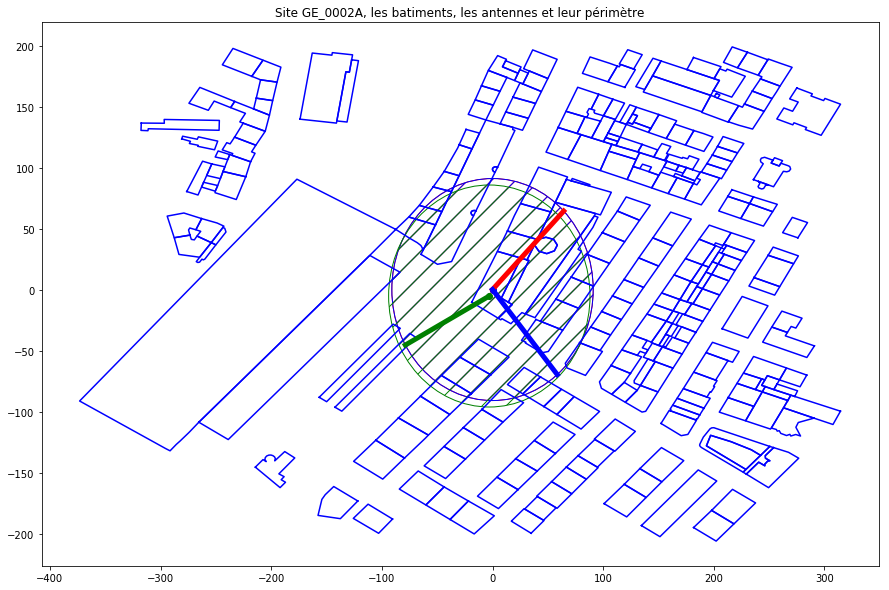

In [670]:
plt.figure(figsize = (15, 10))
# Positionnoment des buildings
for b in F['buildings']:
    plt.plot(F['buildings'][b][:, 0], F['buildings'][b][:, 1], color = 'b')


# Positionnement des antennes et de leurs périmètres
col = ['r', 'b', 'g', 'k', 'm']
d = 0
for a in F['Antennes']:
    plt.scatter(a['X'], a['Y'], c=col[d])
    a_field = plt.Circle((a['X'], a['Y']), a['Perimeter'], color=col[d], fill=False, hatch = '/')
    print (a_field)
    # Tracer les azimuts]
    Az = np.array([np.sin(a['Azimuth'] * math.pi / 180), np.cos(a['Azimuth'] * math.pi / 180)])
    Az = np.vstack((np.array([a['X'],a['Y']]), a['Perimeter'] * Az))
    print (a['Azimuth'], Az)
    plt.plot(Az[:, 0], Az[:, 1], color=col[d], lw = 5)
    plt.gcf().gca().add_artist(a_field)
    d += 1

plt.title("Site %s, les batiments, les antennes et leur périmètre" %(s1))
plt.show()

## Champ électrique pour une antenne : a1

In [673]:
a1, a2, a3 = F['Antennes']

### Discrétisation des polynomes

In [674]:
F['buildings']

{61641473: array([[ -87.42396154,   49.2913336 ],
        [-110.94585406,   27.98470687],
        [-265.44672785, -108.77177663],
        [-273.53968377, -116.44171698],
        [-274.85325846, -117.63283979],
        [-282.4341429 , -124.2341092 ],
        [-285.76260757, -126.91691852],
        [-291.43992191, -132.21574523],
        [-295.52536183, -130.32330712],
        [-373.18211632,  -91.38360999],
        [-176.80270033,   90.44629652],
        [ -87.42396154,   49.2913336 ]]),
 82590576: array([[ 100.81797057, -175.51918201],
        [ 111.404492  , -181.15196839],
        [ 121.24517018, -186.38400317],
        [ 138.84484462, -170.46525905],
        [ 119.04103638, -159.66722983],
        [ 110.71430869, -166.9141546 ],
        [ 100.81797057, -175.51918201]]),
 82590582: array([[ 152.2811552 , -109.77365563],
        [ 161.86579764, -115.03908638],
        [ 170.515353  , -119.79244563],
        [ 176.56002297, -118.76830265],
        [ 180.31150323, -113.16891224],
      

In [675]:
bat1 = F['buildings'][61641473]

In [676]:
bat1

array([[ -87.42396154,   49.2913336 ],
       [-110.94585406,   27.98470687],
       [-265.44672785, -108.77177663],
       [-273.53968377, -116.44171698],
       [-274.85325846, -117.63283979],
       [-282.4341429 , -124.2341092 ],
       [-285.76260757, -126.91691852],
       [-291.43992191, -132.21574523],
       [-295.52536183, -130.32330712],
       [-373.18211632,  -91.38360999],
       [-176.80270033,   90.44629652],
       [ -87.42396154,   49.2913336 ]])

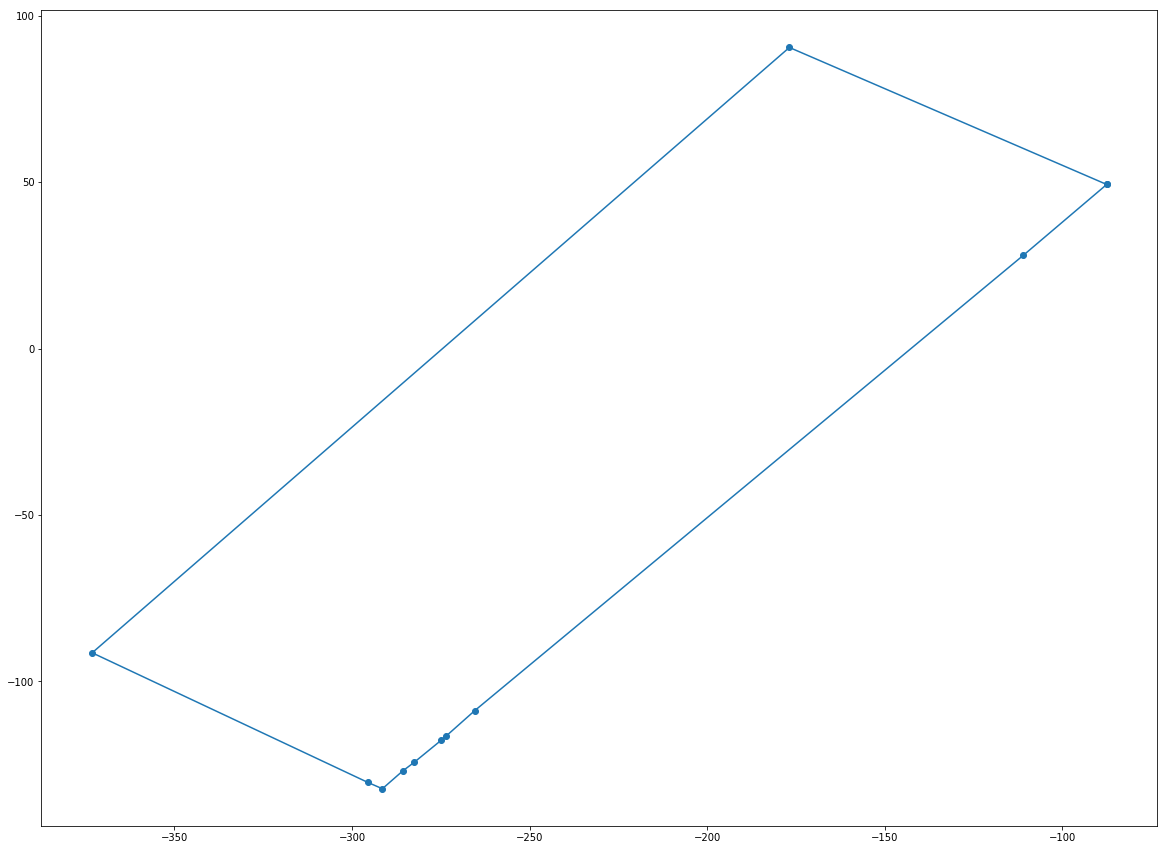

In [677]:
plt.figure(figsize = (20, 15))
plt.plot(bat1[:, 0], bat1[:, 1], '-o')
plt.show()

In [678]:
def discretize(bat, step):
	"""
	Given a numpy array of the bat represented by a polygon
	Returns a numpy array of coordinates in facade
	"""

	# List of pnew positions
	p = []

	p.append(bat[0])

	for k in range(1, len(bat)):
		if k == 0:
			p.append(bat[k])
		else :
			p2 = bat[k]
			p1 = bat[k - 1]
			for i in range(step):
				p.append(p1 + (p2 - p1) * i/step)

	p.append(bat[0])
	return np.array(p)

In [679]:
discretize(bat1, 10)

array([[ -87.42396154,   49.2913336 ],
       [ -87.42396154,   49.2913336 ],
       [ -89.77615079,   47.16067093],
       [ -92.12834004,   45.03000825],
       [ -94.4805293 ,   42.89934558],
       [ -96.83271855,   40.76868291],
       [ -99.1849078 ,   38.63802023],
       [-101.53709705,   36.50735756],
       [-103.88928631,   34.37669489],
       [-106.24147556,   32.24603221],
       [-108.59366481,   30.11536954],
       [-110.94585406,   27.98470687],
       [-126.39594144,   14.30905852],
       [-141.84602882,    0.63341017],
       [-157.2961162 ,  -13.04223818],
       [-172.74620358,  -26.71788653],
       [-188.19629096,  -40.39353488],
       [-203.64637834,  -54.06918323],
       [-219.09646571,  -67.74483158],
       [-234.54655309,  -81.42047993],
       [-249.99664047,  -95.09612828],
       [-265.44672785, -108.77177663],
       [-266.25602344, -109.53877067],
       [-267.06531904, -110.3057647 ],
       [-267.87461463, -111.07275874],
       [-268.68391022, -1

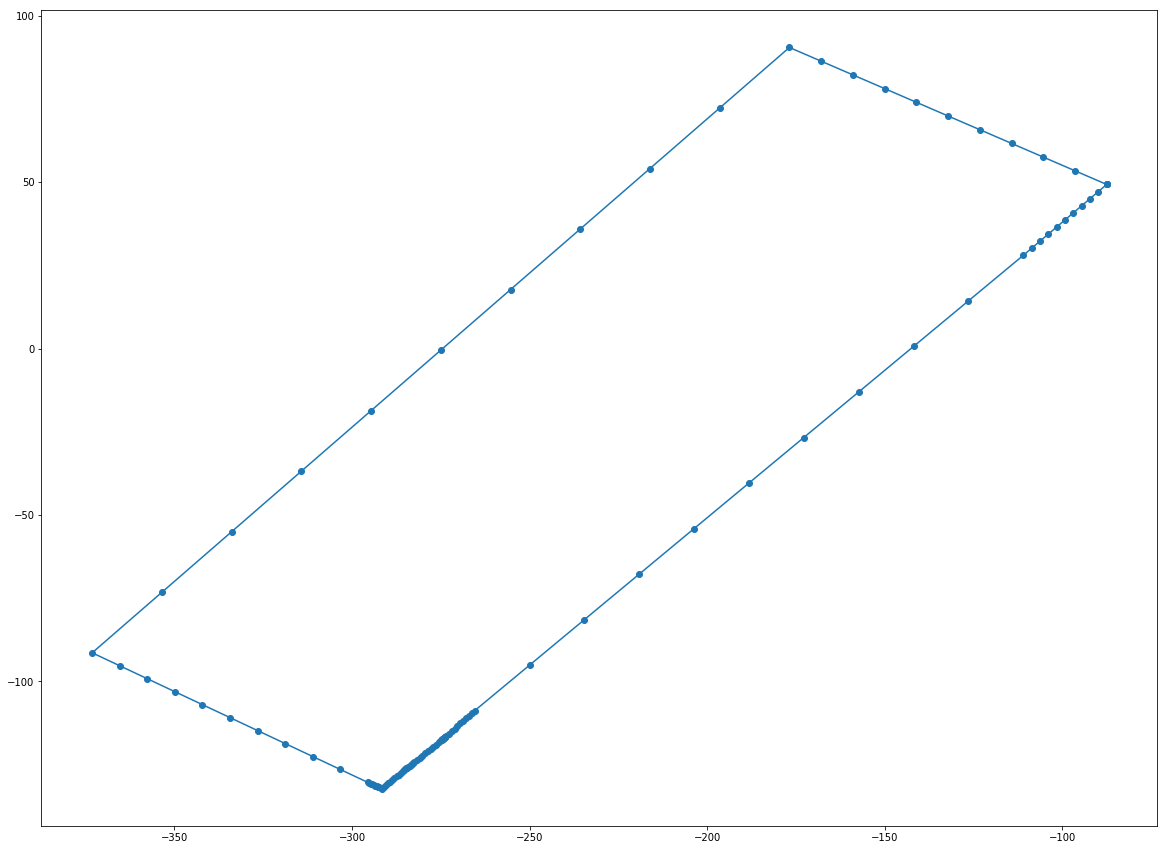

In [680]:
plot_bat(discretize(bat1, 10))

In [681]:
d1 = discretize(bat1, 10)

### Récupération de l'angle d'atténuation horizontale

In [682]:
a1

{'Antenna': 'K80010664',
 'Azimuth': 45.0,
 'ERP(W)': 820,
 'ElecTilt': -2,
 'Frequency': 800,
 'Hight': 30.3,
 'MecaTilit': 0,
 'Operator': 'Salt',
 'Perimeter': 91,
 'Sector Name': '1STK',
 'Sector Number': 1,
 'X': 0.0,
 'Y': 0.0}

In [683]:
A1 = np.array([a1['X'], a1['Y']])

In [684]:
distance = np.linalg.norm(d1 - A1, axis = 1)

In [685]:
distance

array([ 100.36226691,  100.36226691,  101.40949725,  102.5442962 ,
        103.76379073,  105.06503171,  106.44502122,  107.90073788,
        109.42915955,  111.02728368,  112.69214489,  114.42083006,
        127.2033143 ,  141.84744305,  157.83588992,  174.80016107,
        192.48241891,  210.70197907,  229.33081671,  248.27682155,
        267.47260395,  286.86802666,  287.90799277,  288.94851853,
        289.98959791,  291.03122498,  292.07339387,  293.1160988 ,
        294.15933408,  295.20309409,  296.24737326,  297.29216615,
        297.45968757,  297.62722036,  297.79476447,  297.96231991,
        298.12988663,  298.29746464,  298.4650539 ,  298.63265441,
        298.80026613,  298.96788905,  299.92472476,  300.88187597,
        301.8393397 ,  302.79711296,  303.75519285,  304.71357645,
        305.67226093,  306.63124344,  307.59052122,  308.55009149,
        308.96280589,  309.37556045,  309.78835503,  310.20118946,
        310.61406358,  311.02697723,  311.43993027,  311.85292

In [686]:
# Azimut de a1
Az1 = np.array([np.sin(a1['Azimuth'] * math.pi / 360), np.cos(a1['Azimuth'] * math.pi / 360)])
Az1

array([ 0.38268343,  0.92387953])

In [687]:
# Vecteur distance normalizé
(d1 - A1) / distance.reshape(-1, 1)

array([[-0.87108397,  0.49113412],
       [-0.87108397,  0.49113412],
       [-0.88528346,  0.46505182],
       [-0.89842481,  0.43912738],
       [-0.91053467,  0.41343271],
       [-0.92164555,  0.38803284],
       [-0.93179471,  0.3629857 ],
       [-0.94102319,  0.33834206],
       [-0.9493748 ,  0.31414565],
       [-0.95689521,  0.29043341],
       [-0.96363118,  0.26723575],
       [-0.96962987,  0.24457703],
       [-0.99365289,  0.11248967],
       [-0.99999003,  0.00446543],
       [-0.99658016, -0.08263164],
       [-0.98824968, -0.15284818],
       [-0.97773237, -0.20985571],
       [-0.96651384, -0.2566145 ],
       [-0.95537298, -0.29540222],
       [-0.94469774, -0.32794233],
       [-0.9346626 , -0.35553596],
       [-0.92532699, -0.37917009],
       [-0.92479553, -0.3804645 ],
       [-0.9242661 , -0.38174885],
       [-0.9237387 , -0.38302325],
       [-0.92321334, -0.38428781],
       [-0.92269002, -0.38554264],
       [-0.92216873, -0.38678783],
       [-0.92164948,

In [688]:
# Produit scalaire avec l'azimut
np.dot((d1 - A1) / distance.reshape(-1, 1), Az1)

array([ 0.12039936,  0.12039936,  0.09086854,  0.06188851,  0.03351549,
        0.00579712, -0.02122734, -0.04752668, -0.07307727, -0.09786246,
       -0.12187205, -0.14510157, -0.2763276 , -0.3785541 , -0.4577164 ,
       -0.51940009, -0.56804337, -0.60694972, -0.63852147, -0.66449938,
       -0.68615229, -0.7044148 , -0.70540729, -0.70639127, -0.70736684,
       -0.7083341 , -0.70929314, -0.71024406, -0.71118696, -0.71212193,
       -0.71304906, -0.71396844, -0.71410529, -0.71424197, -0.71437846,
       -0.71451477, -0.7146509 , -0.71478685, -0.71492263, -0.71505822,
       -0.71519363, -0.71532887, -0.71604749, -0.7167608 , -0.71746883,
       -0.71817166, -0.71886932, -0.71956188, -0.72024939, -0.72093191,
       -0.72160947, -0.72228213, -0.7225318 , -0.72278071, -0.72302886,
       -0.72327625, -0.7235229 , -0.7237688 , -0.72401396, -0.72425837,
       -0.72450205, -0.724745  , -0.72530278, -0.72585748, -0.72640913,
       -0.72695774, -0.72750334, -0.72804596, -0.72858562, -0.72

In [689]:
# Récupération de l'angle d'atténuation horizontale
hor = np.arccos(np.dot((d1 - A1) / distance.reshape(-1, 1), Az1))*360 / math.pi
hor

array([ 166.16969749,  166.16969749,  169.57284882,  172.90356424,
        176.15868858,  179.33569525,  182.43265695,  185.4482093 ,
        188.38150917,  191.23218957,  194.00031262,  196.68632211,
        212.08229204,  224.48829744,  234.47969709,  242.58403806,
        249.22779336,  254.73854601,  259.3633152 ,  263.28786187,
        266.65259106,  269.56457169,  269.72491571,  269.88410521,
        270.04215202,  270.1990678 ,  270.35486406,  270.50955218,
        270.66314337,  270.81564872,  270.96707916,  271.11744551,
        271.13984544,  271.16222016,  271.18456971,  271.20689411,
        271.22919343,  271.25146769,  271.27371693,  271.29594121,
        271.31814055,  271.340315  ,  271.4582217 ,  271.57537837,
        271.69179189,  271.80746908,  271.92241667,  272.03664131,
        272.15014957,  272.26294795,  272.37504287,  272.48644069,
        272.52781605,  272.56908102,  272.61023603,  272.65128149,
        272.69221785,  272.73304551,  272.77376491,  272.81437

In [690]:
[att_h[np.round(y)] for y in hor]

[48.26,
 48.26,
 65.86,
 50.81,
 46.12,
 43.87,
 42.74,
 42.52,
 43.15,
 44.67,
 46.54,
 46.18,
 33.27,
 28.27,
 26.01,
 24.72,
 23.63,
 22.22,
 21.02,
 19.68,
 18.31,
 17.28,
 17.28,
 17.28,
 17.28,
 17.28,
 17.28,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.6,
 16.6,
 16.6,
 16.6,
 16.6,
 16.6,
 16.6,
 16.6,
 16.6,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 15.94,
 15.94,
 15.94,
 15.94,
 15.94,
 15.94,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 17.28,
 17.97,
 18.65,
 19.34,
 20.02,
 20.69,
 21.33,
 21.93,
 22.49,
 22.75,
 23.82,
 24.55,
 25.45,
 26.33,
 27.97,
 30.8,
 35.86,
 46.18,
 42.52,
 58.11,
 58.11,
 65.86,
 65.86,
 65.86,
 61.33,
 61.33,
 54.98,
 54.98,
 51.06,
 48.26]

In [691]:
hor[0]

166.16969748980787

In [692]:
att_h

{0.0: 0.0,
 1.0: 0.01,
 2.0: 0.02,
 3.0: 0.04,
 4.0: 0.06,
 5.0: 0.09,
 6.0: 0.12,
 7.0: 0.16,
 8.0: 0.2,
 9.0: 0.25,
 10.0: 0.31,
 11.0: 0.36,
 12.0: 0.43,
 13.0: 0.5,
 14.0: 0.57,
 15.0: 0.65,
 16.0: 0.73,
 17.0: 0.82,
 18.0: 0.92,
 19.0: 1.02,
 20.0: 1.13,
 21.0: 1.24,
 22.0: 1.35,
 23.0: 1.47,
 24.0: 1.6,
 25.0: 1.73,
 26.0: 1.86,
 27.0: 2.0,
 28.0: 2.14,
 29.0: 2.29,
 30.0: 2.44,
 31.0: 2.59,
 32.0: 2.75,
 33.0: 2.92,
 34.0: 3.09,
 35.0: 3.26,
 36.0: 3.44,
 37.0: 3.62,
 38.0: 3.81,
 39.0: 4.0,
 40.0: 4.19,
 41.0: 4.38,
 42.0: 4.58,
 43.0: 4.79,
 44.0: 4.99,
 45.0: 5.21,
 46.0: 5.42,
 47.0: 5.64,
 48.0: 5.86,
 49.0: 6.08,
 50.0: 6.31,
 51.0: 6.54,
 52.0: 6.77,
 53.0: 7.01,
 54.0: 7.25,
 55.0: 7.49,
 56.0: 7.74,
 57.0: 7.98,
 58.0: 8.23,
 59.0: 8.48,
 60.0: 8.74,
 61.0: 8.99,
 62.0: 9.25,
 63.0: 9.51,
 64.0: 9.77,
 65.0: 10.03,
 66.0: 10.29,
 67.0: 10.55,
 68.0: 10.82,
 69.0: 11.09,
 70.0: 11.35,
 71.0: 11.63,
 72.0: 11.9,
 73.0: 12.17,
 74.0: 12.44,
 75.0: 12.71,
 76.0: 12.98,
 77.

In [693]:
Attenuation = np.array(list(att_h.values()))[np.rint(hor).astype(int)]

In [694]:
E = np.sqrt(a1['ERP(W)'] / np.exp(Attenuation/10 * np.log(10))) * 7 / distance

In [695]:
a1

{'Antenna': 'K80010664',
 'Azimuth': 45.0,
 'ERP(W)': 820,
 'ElecTilt': -2,
 'Frequency': 800,
 'Hight': 30.3,
 'MecaTilit': 0,
 'Operator': 'Salt',
 'Perimeter': 91,
 'Sector Name': '1STK',
 'Sector Number': 1,
 'X': 0.0,
 'Y': 0.0}

In [696]:
d1[E.argmax()]

array([-289.73672761, -130.62609722])

In [697]:
E.max()

0.10065181282283274

In [698]:
E

array([ 0.00771675,  0.00771675,  0.00100676,  0.0056311 ,  0.00954903,
        0.01221931,  0.01373661,  0.0138989 ,  0.01274594,  0.0105457 ,
        0.00837744,  0.00860003,  0.03419846,  0.05453602,  0.06357688,
        0.0665983 ,  0.0685668 ,  0.07367775,  0.07772175,  0.0837662 ,
        0.09103862,  0.09557027,  0.09522506,  0.09488214,  0.09454151,
        0.09420314,  0.09386701,  0.09726695,  0.09692199,  0.0965793 ,
        0.09623886,  0.09590064,  0.09584663,  0.09579268,  0.09573878,
        0.09568495,  0.09563117,  0.09557744,  0.09552378,  0.09547016,
        0.09541661,  0.09536311,  0.09505888,  0.09853918,  0.0982266 ,
        0.0979159 ,  0.09760707,  0.09730007,  0.09699491,  0.09669156,
        0.09639001,  0.09609024,  0.09967787,  0.09954489,  0.09941224,
        0.09927994,  0.09914798,  0.09901635,  0.09888506,  0.0987541 ,
        0.09862348,  0.09849319,  0.09826251,  0.09803285,  0.09780419,
        0.09757653,  0.09734987,  0.0971242 ,  0.10065181,  0.10

In [699]:
E = E_bat_antenna(d1, a1, att_h, att_v)
E

array([[ 0.04528293],
       [ 0.04528293],
       [ 0.04255262],
       [ 0.03724719],
       [ 0.03176575],
       [ 0.02884342],
       [ 0.02346279],
       [ 0.02070049],
       [ 0.01568093],
       [ 0.01321525],
       [ 0.00885343],
       [ 0.00676862],
       [ 0.00572146],
       [ 0.00955396],
       [ 0.00950165],
       [ 0.00761138],
       [ 0.00563137],
       [ 0.00433847],
       [ 0.00429084],
       [ 0.00494959],
       [ 0.00595286],
       [ 0.00627802],
       [ 0.00625534],
       [ 0.00623282],
       [ 0.0069522 ],
       [ 0.00692732],
       [ 0.0069026 ],
       [ 0.00687805],
       [ 0.00685366],
       [ 0.00682942],
       [ 0.00680535],
       [ 0.00678143],
       [ 0.00677761],
       [ 0.0067738 ],
       [ 0.00676999],
       [ 0.00676618],
       [ 0.00676238],
       [ 0.00675858],
       [ 0.00675478],
       [ 0.00675099],
       [ 0.00674721],
       [ 0.00674342],
       [ 0.00672191],
       [ 0.00670053],
       [ 0.00667927],
       [ 0

In [700]:
OMEN_bat(bat1, F['Antennes'], att_h, att_v)

(array([-87.42396154,  49.2913336 ]), 1.3746220891200647)

In [701]:
OMEN = OMEN_per_site(F, att_h, att_v)

Circle((0,0),r=91)
45.0 [[  0.           0.        ]
 [ 64.34671709  64.34671709]]
Circle((0,0),r=91)
140.0 [[  0.           0.        ]
 [ 58.49367248 -69.71004432]]
Circle((-2.9,-5.3),r=91)
240.0 [[ -2.9         -5.3       ]
 [-78.80831174 -45.5       ]]


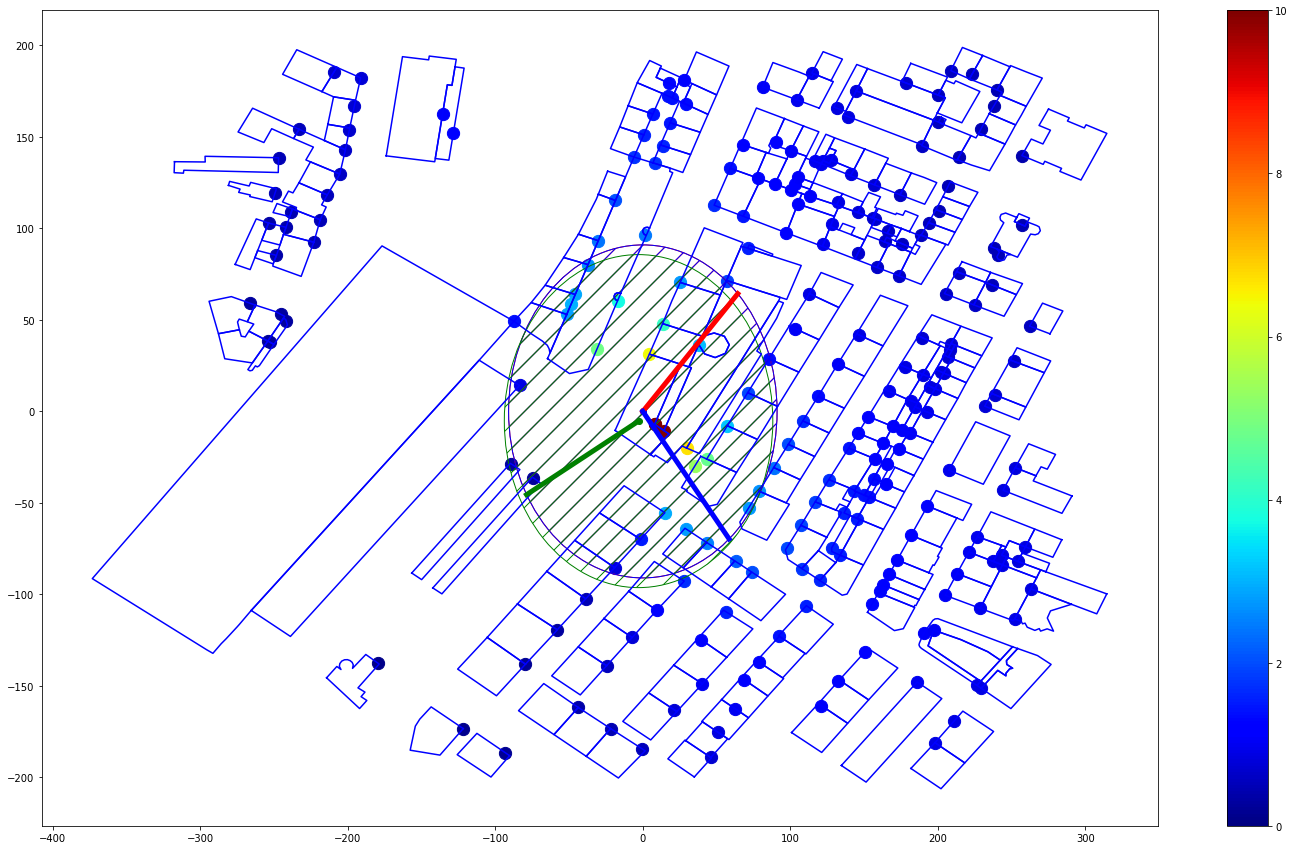

In [702]:
plt.figure(figsize = (25, 15))
# Positionnoment des buildings
for b in F['buildings']:
    plt.plot(F['buildings'][b][:, 0], F['buildings'][b][:, 1], color = 'b')

cm = plt.cm.get_cmap('jet')
for x in OMEN:
    plt.scatter(OMEN[x][0][0], OMEN[x][0][1], c=OMEN[x][1], vmin=0, vmax=10, s=150, cmap=cm)
plt.colorbar()

    
# Positionnement des antennes et de leurs périmètres
col = ['r', 'b', 'g', 'k', 'm']
d = 0
for a in F['Antennes']:
    plt.scatter(a['X'], a['Y'], c=col[d])
    a_field = plt.Circle((a['X'], a['Y']), a['Perimeter'], color=col[d], fill=False, hatch = '/')
    print (a_field)
    # Tracer les azimuts]
    Az = np.array([np.sin(a['Azimuth'] * math.pi / 180), np.cos(a['Azimuth'] * math.pi / 180)])
    Az = np.vstack((np.array([a['X'],a['Y']]), a['Perimeter'] * Az))
    print (a['Azimuth'], Az)
    plt.plot(Az[:, 0], Az[:, 1], color=col[d], lw = 5)
    plt.gcf().gca().add_artist(a_field)
    d += 1
    
plt.show()

In [703]:
OMEN

{61641473: (array([-87.42396154,  49.2913336 ]), 1.3746220891200647),
 82590576: (array([ 121.02141721, -160.74703275]), 1.0844415191714738),
 82590582: (array([ 155.22890586, -105.51678308]), 1.2964536901650314),
 82590592: (array([ 229.37017826, -151.31823817]), 0.88467792879751983),
 82590601: (array([ 185.91089364, -147.8784536 ]), 1.0152568320197872),
 82681824: (array([ 231.75242388,    2.84867596]), 0.76343653588383942),
 82681847: (array([ 207.46242413,  -32.12803313]), 0.97065523914239893),
 82681891: (array([ 256.94411474,  139.83893122]), 0.39259007433222226),
 82681896: (array([ 160.51882698,  -97.94035144]), 1.2921413207961916),
 82683726: (array([-179.64469709, -137.52793033]), 0.090705422368550254),
 82683741: (array([-121.74388328, -173.34844418]), 0.13785893781828959),
 82683744: (array([  21.1407601, -163.0090529]), 0.76094853859146805),
 82683752: (array([ 14.94580828, -55.37162593]), 2.9624337610330529),
 82753315: (array([-89.18170259, -28.70828615]), 0.27912793739

In [704]:
Az1

array([ 0.38268343,  0.92387953])

In [705]:
a1

{'Antenna': 'K80010664',
 'Azimuth': 45.0,
 'ERP(W)': 820,
 'ElecTilt': -2,
 'Frequency': 800,
 'Hight': 30.3,
 'MecaTilit': 0,
 'Operator': 'Salt',
 'Perimeter': 91,
 'Sector Name': '1STK',
 'Sector Number': 1,
 'X': 0.0,
 'Y': 0.0}

In [706]:
a2

{'Antenna': 'K80010664',
 'Azimuth': 140.0,
 'ERP(W)': 1200,
 'ElecTilt': -2,
 'Frequency': 800,
 'Hight': 30.3,
 'MecaTilit': 0,
 'Operator': 'Salt',
 'Perimeter': 91,
 'Sector Name': '2STK',
 'Sector Number': 2,
 'X': 0.0,
 'Y': 0.0}

In [707]:
a3

{'Antenna': 'K80010664',
 'Azimuth': 240.0,
 'ERP(W)': 1200,
 'ElecTilt': -2,
 'Frequency': 800,
 'Hight': 30.0,
 'MecaTilit': 0,
 'Operator': 'Salt',
 'Perimeter': 91,
 'Sector Name': '3STKE',
 'Sector Number': 3,
 'X': -2.9,
 'Y': -5.3}

In [708]:
Az1 = np.array([np.sin(a1['Azimuth'] * math.pi / 180), np.cos(a1['Azimuth'] * math.pi / 180)])
Az1

array([ 0.70710678,  0.70710678])

In [709]:
Az2 = np.array([np.sin(a2['Azimuth'] * math.pi / 180), np.cos(a2['Azimuth'] * math.pi / 180)])
Az2

array([ 0.64278761, -0.76604444])

In [710]:
Az3 = np.array([np.sin(a3['Azimuth'] * math.pi / 180), np.cos(a3['Azimuth'] * math.pi / 180)])
Az3

array([-0.8660254, -0.5      ])

In [711]:
OMEN_per_site(F, att_h, att_v)

{61641473: (array([-87.42396154,  49.2913336 ]), 1.3746220891200647),
 82590576: (array([ 121.02141721, -160.74703275]), 1.0844415191714738),
 82590582: (array([ 155.22890586, -105.51678308]), 1.2964536901650314),
 82590592: (array([ 229.37017826, -151.31823817]), 0.88467792879751983),
 82590601: (array([ 185.91089364, -147.8784536 ]), 1.0152568320197872),
 82681824: (array([ 231.75242388,    2.84867596]), 0.76343653588383942),
 82681847: (array([ 207.46242413,  -32.12803313]), 0.97065523914239893),
 82681891: (array([ 256.94411474,  139.83893122]), 0.39259007433222226),
 82681896: (array([ 160.51882698,  -97.94035144]), 1.2921413207961916),
 82683726: (array([-179.64469709, -137.52793033]), 0.090705422368550254),
 82683741: (array([-121.74388328, -173.34844418]), 0.13785893781828959),
 82683744: (array([  21.1407601, -163.0090529]), 0.76094853859146805),
 82683752: (array([ 14.94580828, -55.37162593]), 2.9624337610330529),
 82753315: (array([-89.18170259, -28.70828615]), 0.27912793739

In [712]:
import csv

In [713]:
output = csv.writer(open(s1 + ".csv", "w"), delimiter=";")
output.writerow(["OMEN_ID", "X", "Y", "Z", "Efield", "Approved"])
for key, value in OMEN.items():
    if value[1] > 5:
        Approved = "No"
    else:
        Approved = "Yes"
    if np.linalg.norm(value[0]) < a1['Perimeter'] :
        output.writerow([key, value[0][0], value[0][1], 10, value[1], Approved])

In [714]:
OMEN.items()

dict_items([(61641473, (array([-87.42396154,  49.2913336 ]), 1.3746220891200647)), (82590576, (array([ 121.02141721, -160.74703275]), 1.0844415191714738)), (82590582, (array([ 155.22890586, -105.51678308]), 1.2964536901650314)), (82590592, (array([ 229.37017826, -151.31823817]), 0.88467792879751983)), (82590601, (array([ 185.91089364, -147.8784536 ]), 1.0152568320197872)), (82681824, (array([ 231.75242388,    2.84867596]), 0.76343653588383942)), (82681847, (array([ 207.46242413,  -32.12803313]), 0.97065523914239893)), (82681891, (array([ 256.94411474,  139.83893122]), 0.39259007433222226)), (82681896, (array([ 160.51882698,  -97.94035144]), 1.2921413207961916)), (82683726, (array([-179.64469709, -137.52793033]), 0.090705422368550254)), (82683741, (array([-121.74388328, -173.34844418]), 0.13785893781828959)), (82683744, (array([  21.1407601, -163.0090529]), 0.76094853859146805)), (82683752, (array([ 14.94580828, -55.37162593]), 2.9624337610330529)), (82753315, (array([-89.18170259, -28.

In [715]:
for key, value in OMEN.items():
    print (value[0][0])

-87.42396154
121.021417206
155.228905862
229.37017826
185.910893638
231.752423882
207.462424127
256.944114738
160.518826982
-179.644697092
-121.743883284
21.1407600989
14.9458082823
-89.1817025856
104.346811049
71.7234044111
-74.2281019111
214.052561549
-31.01817384
-5.99346281774
7.97718323774
68.0865836411
214.621406181
35.3529703133
97.66316492
238.019733627
-246.900834362
-266.072345627
-223.022718196
-135.792453262
-209.477314116
-93.2181617566
-19.0846817511
-38.6992461734
-57.96871894
-79.5647773845
-1.54066726225
28.0704231822
39.6521444222
-7.24024557333
62.9068692111
-0.724692476633
-43.7754331067
56.7052382012
43.2878519934
29.2760175789
-24.5393563066
73.7672375711
9.43547378222
-21.8342830067
40.3712709045
198.022497549
50.6906246045
92.51350686
68.5196180088
211.24618715
132.497384551
150.549017733
79.0360079123
110.84789256
62.5294947878
46.0819812045
200.193235382
208.753734838
229.118595311
223.167434051
200.282291293
237.757018689
81.2590660933
178.161916172
139.14540

In [716]:
a1['Perimeter']

91

In [717]:
s1

'GE_0002A'

In [718]:
F2, F3, F4 = map_to_antenna(sites, s2), map_to_antenna(sites, s3), map_to_antenna(sites, s4)

In [725]:
F4

{'Antennes': [{'Antenna': 'K80010664_800',
   'Azimuth': 30,
   'ERP(W)': 1200,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 25.8,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '1STK',
   'Sector Number': 1,
   'X': -11,
   'Y': 25.5},
  {'Antenna': 'K80010664_800',
   'Azimuth': 150,
   'ERP(W)': 1050,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 24.2,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '2STK',
   'Sector Number': 2,
   'X': 0,
   'Y': 0.0},
  {'Antenna': 'K80010664_800',
   'Azimuth': 260,
   'ERP(W)': 1200,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 24.2,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '3STK',
   'Sector Number': 3,
   'X': 0,
   'Y': 0.0}],
 'Site': {'LAT': 47.397179559999998,
  'LON': 8.5321410800000006,
  'Name': 'ZH_0050A'},
 'buildings': {42692975: array([[-169.46004046,  137.82960723],
         [-145.45947241,  141.73693533],
  

In [720]:
OMEN2, OMEN3, OMEN4 = OMEN_per_site(F2, att_h, att_v), OMEN_per_site(F3, att_h, att_v), OMEN_per_site(F4, att_h, att_v)

In [736]:
output = csv.writer(open(s4 + ".csv", "w"), delimiter=";")
output.writerow(["OMEN_ID", "X", "Y", "Z", "Efield", "Approved"])
for key, value in OMEN4.items():
    if value[1] > 5:
        Approved = "No"
    else:
        Approved = "Yes"
    if np.linalg.norm(value[0]) < 91 :
        output.writerow([key, value[0][0], value[0][1], 10, value[1], Approved])

In [733]:
F4

{'Antennes': [{'Antenna': 'K80010664_800',
   'Azimuth': 30,
   'ERP(W)': 1200,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 25.8,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '1STK',
   'Sector Number': 1,
   'X': -11,
   'Y': 25.5},
  {'Antenna': 'K80010664_800',
   'Azimuth': 150,
   'ERP(W)': 1050,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 24.2,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '2STK',
   'Sector Number': 2,
   'X': 0,
   'Y': 0.0},
  {'Antenna': 'K80010664_800',
   'Azimuth': 260,
   'ERP(W)': 1200,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 24.2,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '3STK',
   'Sector Number': 3,
   'X': 0,
   'Y': 0.0}],
 'Site': {'LAT': 47.397179559999998,
  'LON': 8.5321410800000006,
  'Name': 'ZH_0050A'},
 'buildings': {42692975: array([[-169.46004046,  137.82960723],
         [-145.45947241,  141.73693533],
  

{'Antennes': [{'Antenna': 'K80010664_800',
   'Azimuth': 30,
   'ERP(W)': 1200,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 25.8,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '1STK',
   'Sector Number': 1,
   'X': -11,
   'Y': 25.5},
  {'Antenna': 'K80010664_800',
   'Azimuth': 150,
   'ERP(W)': 1050,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 24.2,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '2STK',
   'Sector Number': 2,
   'X': 0,
   'Y': 0.0},
  {'Antenna': 'K80010664_800',
   'Azimuth': 260,
   'ERP(W)': 1200,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 24.2,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '3STK',
   'Sector Number': 3,
   'X': 0,
   'Y': 0.0}],
 'Site': {'LAT': 47.397179559999998,
  'LON': 8.5321410800000006,
  'Name': 'ZH_0050A'},
 'buildings': {42692975: array([[-169.46004046,  137.82960723],
         [-145.45947241,  141.73693533],
  

# Représentation graphique pour n'importe quel site

In [744]:
def representation(F, OMEN):
    plt.figure(figsize = (25, 15))
    # Positionnoment des buildings
    for b in F['buildings']:
        plt.plot(F['buildings'][b][:, 0], F['buildings'][b][:, 1], color = 'b')

    cm = plt.cm.get_cmap('jet')
    for x in OMEN:
        plt.scatter(OMEN[x][0][0], OMEN[x][0][1], c=OMEN[x][1], vmin=0, vmax=10, s=150, cmap=cm)
    plt.colorbar()


    # Positionnement des antennes et de leurs périmètres
    col = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    d = 0
    for a in F['Antennes']:
        plt.scatter(a['X'], a['Y'], c=col[d])
        a_field = plt.Circle((a['X'], a['Y']), a['Perimeter'], color=col[d], fill=False, hatch = '/')
        print (a_field)
        # Tracer les azimuts]
        Az = np.array([np.sin(a['Azimuth'] * math.pi / 180), np.cos(a['Azimuth'] * math.pi / 180)])
        Az = np.vstack((np.array([a['X'],a['Y']]), a['Perimeter'] * Az))
        print (a['Azimuth'], Az)
        plt.plot(Az[:, 0], Az[:, 1], color=col[d], lw = 5)
        plt.gcf().gca().add_artist(a_field)
        d += 1
        d %= len(col)

    plt.show()

Circle((-19,-16),r=80)
279.0 [[-19.         -16.        ]
 [-79.01506725  12.5147572 ]]
Circle((13,-5),r=80)
85.0 [[ 13.          -5.        ]
 [ 79.69557585   6.97245942]]
Circle((-22,-7),r=80)
188.0 [[-22.          -7.        ]
 [-11.13384808 -79.2214455 ]]
Circle((14,12),r=80)
75.0 [[ 14.          12.        ]
 [ 77.2740661   20.70552361]]
Circle((-22,-7),r=80)
188.0 [[-22.          -7.        ]
 [-11.13384808 -79.2214455 ]]
Circle((-20,-17),r=80)
279.0 [[-20.         -17.        ]
 [-79.01506725  12.5147572 ]]
Circle((-16,38),r=80)
0.0 [[-16.  38.]
 [  0.  80.]]
Circle((-16,38),r=80)
90.0 [[ -1.60000000e+01   3.80000000e+01]
 [  8.00000000e+01   4.89858720e-15]]
Circle((-16,38),r=80)
230.0 [[-16.          38.        ]
 [-61.28355545 -51.42300877]]


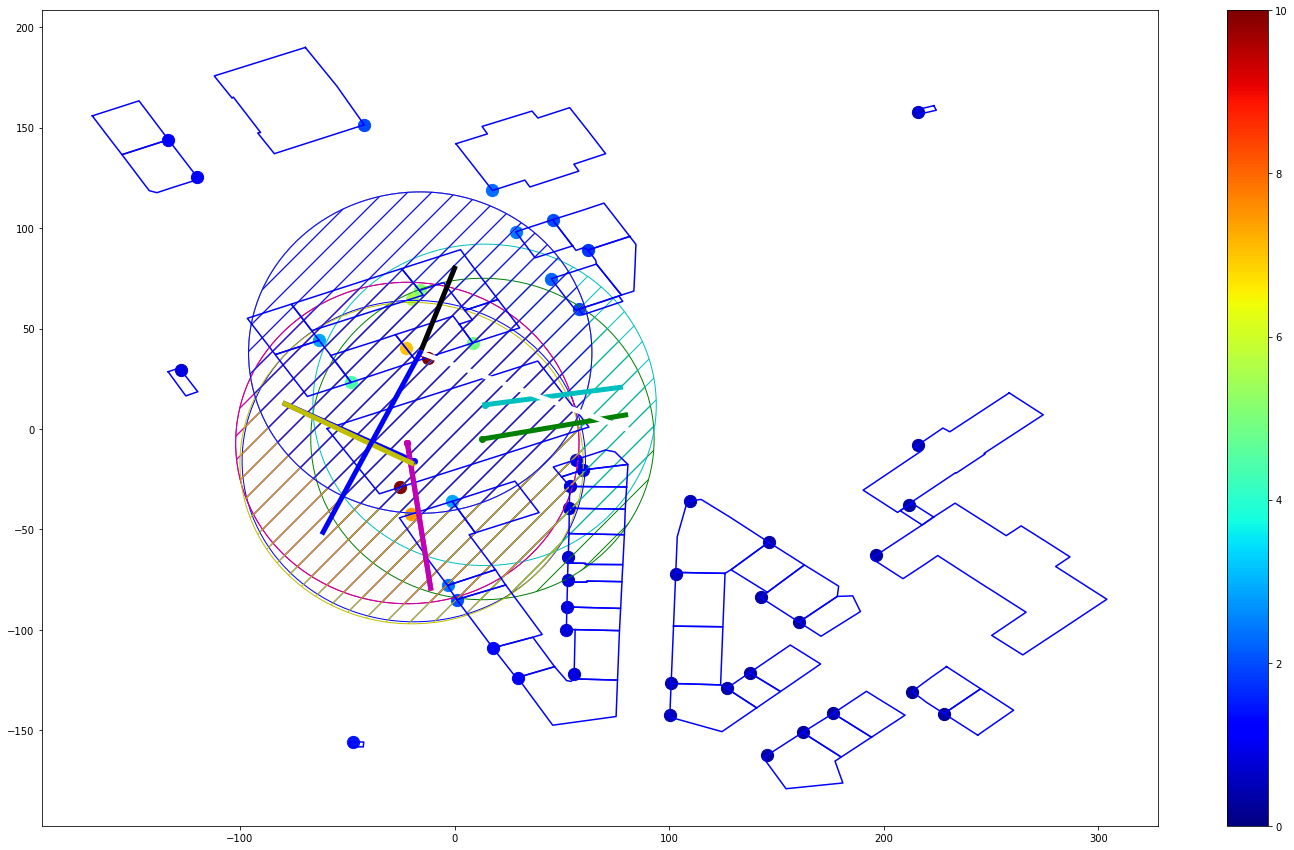

In [745]:
representation(F2, OMEN2)

In [739]:
F2['Site']

{'LAT': 46.199614240000002, 'LON': 6.1421835600000003, 'Name': 'GE_0014C'}

Circle((-0.6,1.2),r=129)
30 [[  -0.6           1.2       ]
 [  64.5         111.71727709]]
Circle((0.8,0.3),r=129)
115 [[   0.8           0.3       ]
 [ 116.91370453  -54.51775576]]
Circle((-0.6,-0.8),r=129)
255 [[  -0.6          -0.8       ]
 [-124.60443159  -33.38765682]]


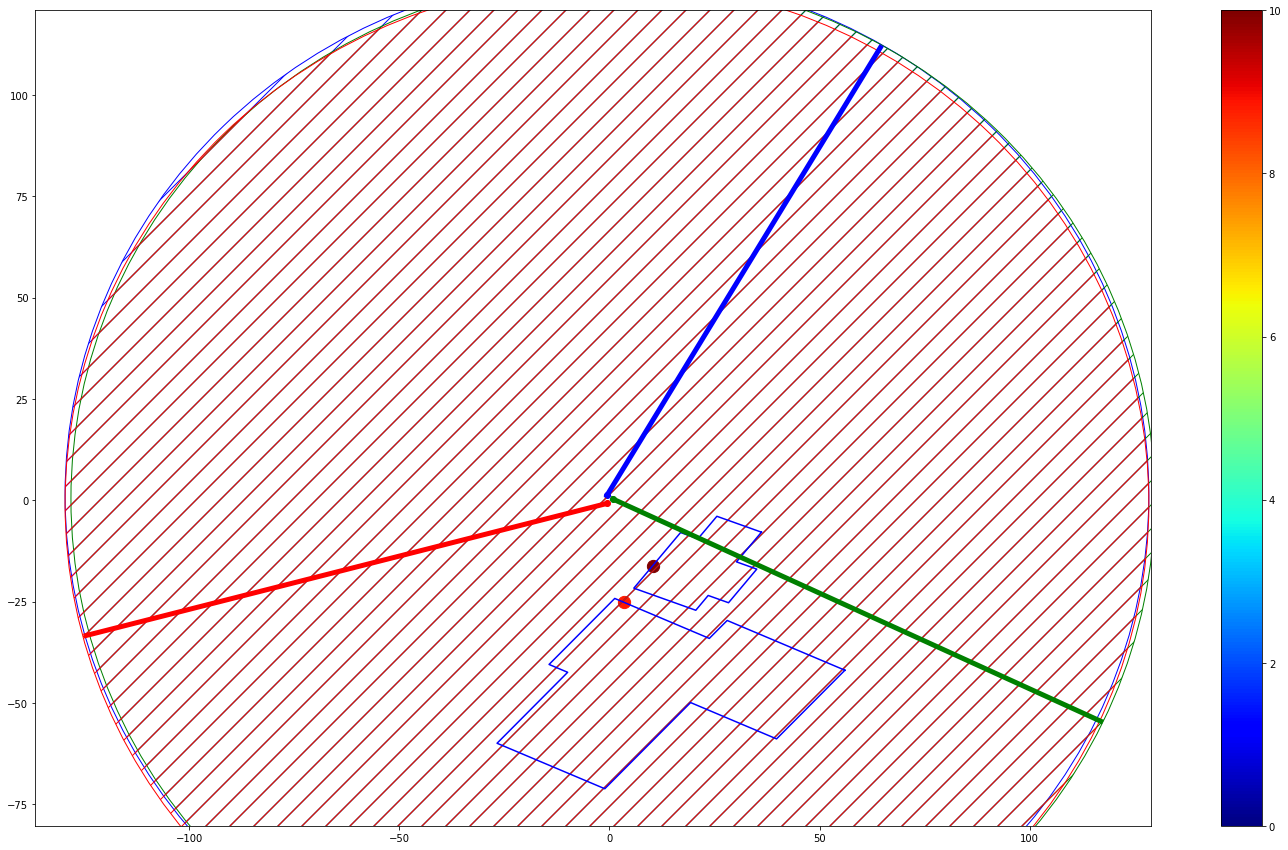

In [746]:
representation(F3, OMEN3)

Circle((-11,25.5),r=91)
30 [[-11.          25.5       ]
 [ 45.5         78.80831174]]
Circle((0,0),r=91)
150 [[  0.           0.        ]
 [ 45.5        -78.80831174]]
Circle((0,0),r=91)
260 [[  0.           0.        ]
 [-89.61750552 -15.80198417]]


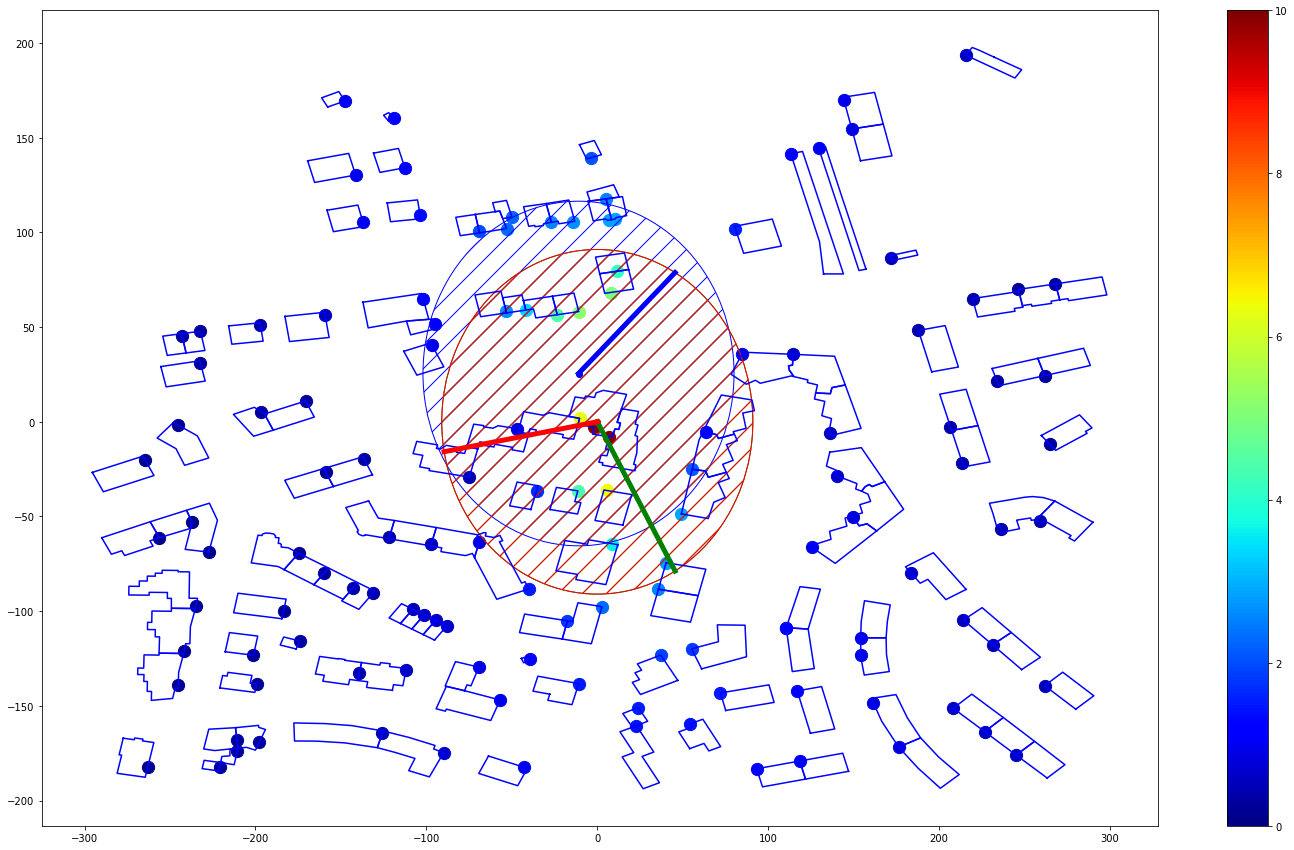

In [747]:
representation(F4, OMEN4)

In [748]:
F4['Site']

{'LAT': 47.397179559999998, 'LON': 8.5321410800000006, 'Name': 'ZH_0050A'}